In [1]:
import numpy as np
from sampler import *
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.stats as stats
from math import prod

np.random.seed(1)

def uniform(x):
    if x < 0:
        return 0
    if x > 1:
        return 0
    else:
        return 1

def normal(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

x0 = 10
sigma = 1

def erf(x):
    if x > 0:
        return (np.exp(-(x-x0)**2/(2*sigma**2) - np.exp(-(x+x0)**2/(2*sigma**2))))/(sigma*np.sqrt(np.pi*2))/sp.erf(x0/sigma/np.sqrt(2))
    else:
        return 0

uniform_sampler = Sampler(uniform, domain=(True, 0, 1))
normal_sampler = Sampler(normal, domain=(True, -5, 5))
erf_sampler = Sampler(erf, domain=(True, 5, 15))

# Exercício 4

## a)

In [2]:
N = [10**(i+1) for i in range(3)]
covariance_1 = []
correlation_1 = []

for n in N:
    uniform_samples = uniform_sampler.sample(n)
    normal_samples = normal_sampler.sample(n)
    xy_1 = Data([uniform_samples.data, normal_samples.data])
    xy_1.set_cov()
    covariance_1.append(xy_1.covariance)
    correlation_1.append(xy_1.correlation)

for i in range(len(N)):
    print(f"{covariance_1[i]:+.4f} {correlation_1[i]:+.4f} {N[i]}")

+0.0397 +0.2246 10
+0.0076 +0.0223 100
-0.0021 -0.0073 1000


Ambos se estabilizam em até duas casas decimais em N = 10000.

## b)

In [3]:
covariance_2 = []
correlation_2 = []

for n in N:
    uniform_samples = uniform_sampler.sample(n)
    normal_samples = normal_sampler.sample(n)
    xy_2 = Data([uniform_samples.data, [uniform_samples.data[i] + normal_samples.data[i] for i in range(n)]])
    xy_2.set_cov()
    covariance_2.append(xy_2.covariance)
    correlation_2.append(xy_2.correlation)    

for i in range(len(N)):
    print(f"{covariance_2[i]:+.4f} {correlation_2[i]:+.4f} {N[i]}")

+0.1627 +0.6981 10
+0.1116 +0.3718 100
+0.0757 +0.2529 1000


In [4]:
covariance_3 = []
correlation_3 = []

for n in N:
    uniform_samples = uniform_sampler.sample(n)
    normal_samples = normal_sampler.sample(n)
    xy_3 = Data([uniform_samples.data, [-uniform_samples.data[i] + normal_samples.data[i] for i in range(n)]])
    xy_3.set_cov()
    covariance_3.append(xy_3.covariance)
    correlation_3.append(xy_3.correlation)    

for i in range(len(N)):
    print(f"{covariance_3[i]:+.4f} {correlation_3[i]:+.4f} {N[i]}")

-0.1086 -0.4255 10
-0.0914 -0.3352 100
-0.0735 -0.2512 1000


## c)

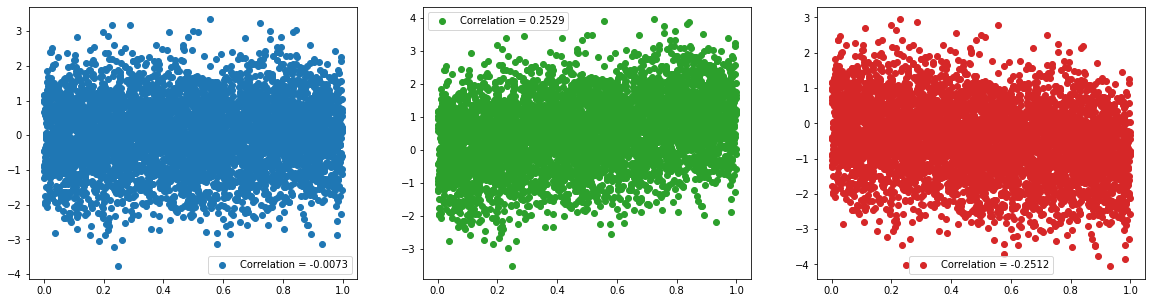

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(20,5), facecolor="white")

n = 5000

uniform_samples = uniform_sampler.sample(n)
normal_samples = normal_sampler.sample(n)
xy_1 = Data([uniform_samples.data, normal_samples.data])
xy_2 = Data([uniform_samples.data, [uniform_samples.data[i] + normal_samples.data[i] for i in range(n)]])
xy_3 = Data([uniform_samples.data, [-uniform_samples.data[i] + normal_samples.data[i] for i in range(n)]])

ax[0].scatter(xy_1.data[0], xy_1.data[1], label=f'Correlation = {correlation_1[-1]:.4f}')
ax[1].scatter(xy_2.data[0], xy_2.data[1], label=f'Correlation = {correlation_2[-1]:.4f}', color='tab:green')
ax[2].scatter(xy_3.data[0], xy_3.data[1], label=f'Correlation = {correlation_3[-1]:.4f}', color='tab:red')
ax[0].legend()
ax[1].legend()
ax[2].legend()